    Code from Teeter 2018

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import AgglomerativeClustering 

Clustering the Parameters

In [100]:
parameters = np.loadtxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allparams.csv", delimiter=',')
print(parameters.shape)

# nrow, ncol = parameters.shape
# # Transform any parameters as needed
# for ii in range(ncol):
#   if (min(parameters[:,ii])*max(parameters[:,ii])>0):
#     if (min(parameters[:,ii])>0):
#       if (st.skew(parameters[:,ii])>st.skew(np.log10(parameters[:,ii]))):
#         print("positive and log")
#         parameters[:,ii]=np.log10(parameters[:,ii])
#     else:
#       if (st.skew(-parameters[:,ii])>st.skew(np.log10(-parameters[:,ii]))):
#         print("negative and log")
#         parameters[:,ii]=np.log10(-parameters[:,ii])

(256, 8)


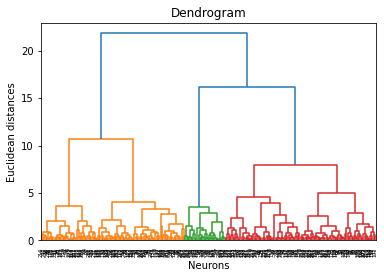

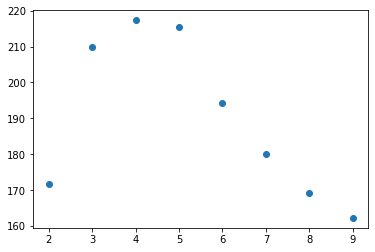

In [108]:
dendrogram = sch.dendrogram(sch.linkage(parameters, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Neurons')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters_list = np.arange(2, 10)
ch_scores = []

for n_clusters in n_clusters_list:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(parameters)
    ch_scores.append(sklearn.metrics.calinski_harabasz_score(parameters, y_hc))
plt.scatter(n_clusters_list, ch_scores)
results = np.zeros((len(ch_scores), 2))
results[:, 0] = n_clusters_list.reshape(-1)
results[:, 1] = ch_scores
np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allparams-chscores.csv", y_hc, delimiter=',')

In [109]:
best_n_clusters = n_clusters_list[np.argmax(ch_scores)]
print(f"using n_clusters {best_n_clusters}")

hc = AgglomerativeClustering(n_clusters = best_n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(parameters)
np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allparams-clusters.csv", y_hc, delimiter=',')

using n_clusters 4


Clustering the f-I curves

In [112]:
isyns = np.loadtxt("results/results_wkof_080821/smnist-4-agn-ficurve-isyns.csv", delimiter=',')
frates = np.loadtxt("results/results_wkof_080821/smnist-4-agn-ficurve-frates.csv", delimiter=',')

num_neurons = frates.shape[1]

thresholds = np.empty(num_neurons)
scale_up = np.empty(num_neurons) # multiplicative factor by which frate is scaled after threshold
med_derivative = np.empty(num_neurons)

for i in range(num_neurons):
    threshold_found = False
    nan_found = False
    derivatives = []
    for j in range(len(isyns) - 1):
        if frates[j, i] >= 0.01 * max(frates[:, i]) and not threshold_found and not nan_found:
            thresholds[i] = isyns[j]
            scale_up[i] = isyns[j + 1] / isyns[j]
            threshold_found = True
        if not np.isnan(frates[j + 1, i]) and not np.isnan(frates[j, i]) and not nan_found:
            derivatives.append((frates[j + 1, i] - frates[j, i]) / (isyns[j + 1] - isyns[j]))
        else:
            print(j)
            nan_found = True
    med_derivative[i] = np.median(derivatives)
    
            
# med_derivative = np.median(derivatives, 1)

features = np.zeros((num_neurons, 3))
features[:, 0] = thresholds
features[:, 1] = med_derivative
features[:, 2] = scale_up
# print(thresholds)
np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allfeatures.csv", features, delimiter=',')

47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
44
45
46
47
48
49
50
51

In [111]:
dendrogram = sch.dendrogram(sch.linkage(features, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Neurons')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters_list = np.arange(2, 256, step = 10)
ch_scores = []
for n_clusters in n_clusters_list:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(features)
    ch_scores.append(sklearn.metrics.calinski_harabasz_score(features, y_hc))
results =  np.zeros((len(n_clusters_list), 2))
results[:, 0] = n_clusters_list
results[:, 1] = ch_scores
np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allfeatures-chscores.csv", results, delimiter=',')

ValueError: The condensed distance matrix must contain only finite values.

found best value at 232


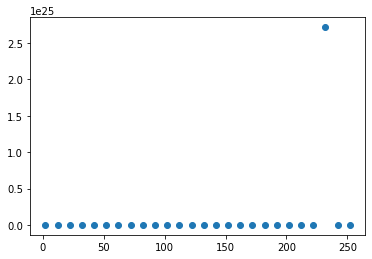

In [97]:
plt.scatter(n_clusters_list, ch_scores)
print(f"found best value at {n_clusters_list[np.argmax(ch_scores)]}")

In [ ]:
hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(features)